In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline


In [2]:
def get_data(filename):
    data=pd.read_csv('housing.csv')
    data=(data-data.mean())/data.std()
    return data

In [3]:
def get_X_Y(data):
    m=len(data)
    X0=np.ones(m)
    X1=data['sqft'].astype(float)
    X2=data['floors'].astype(float)
    X3=data['bedrooms'].astype(float)
    X4=data['bathrooms'].astype(float)
    Y=np.array(data['price'].astype(float))
    X=np.array([X0,X1,X2,X3,X4]).T
    return X,Y
    

In [4]:
def cost_function(X, Y, Theta):
    m = len(X)
    J = np.sum((X.dot(Theta) - Y) ** 2)/(2 * m)
    return J
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse
def get_rmse(Theta):
    X,Y=get_X_Y(test_data)
    Y_Pred=X.dot(Theta)
    return rmse(Y,Y_Pred)


In [5]:
def plot_cost(iter_list,cost_list):
    plt.plot(iter_list,cost_list,'r.')
    plt.xlabel('Iterations ->')
    plt.ylabel('Cost')
    plt.show()

In [6]:
def plot_rmse(alpha_list,rmse_list):
    plt.plot(alpha_list,rmse_list,'r.')
    plt.xlabel('Learning Rate ->')
    plt.ylabel('RMSE')
    plt.show()

In [11]:
def gradientDescent(X, Y, Theta, alpha, m, numIterations,lamda=0):
    m = len(Y)
    cost_list=list()
    iter_list=list()
    tolerance = 1e-5
    theta_old=Theta
    for iteration in range(numIterations):
        # Hypothesis Values
        h = X.dot(Theta)
        loss = h - Y
        gradient = (X.T.dot(loss))/ m
        Theta = (1-(alpha/m)*lamda)*Theta - alpha * gradient
        if np.sum(abs(Theta - theta_old)) < tolerance:
            print("CONVERGED after "+str(iteration)+" iterations")
            break
        cost = cost_function(X, Y, Theta)
        cost_list.append(cost)
        #iter_list.append(iteration)
        theta_old=Theta
        
    return Theta,cost_list,iter_list

In [12]:
def irls_descent(X, Y, Theta, alpha, m, numIterations):
    m = len(Y)
    cost_list=list()
    iter_list=list()
    tolerance = 1e-6
    theta_old=Theta
    Z=X.T.dot(X)
    for iteration in range(numIterations):
        # Hypothesis Values
        h = X.dot(Theta)
        loss = h - Y
        gradient = (X.T.dot(loss))/ m
        Theta = Theta - alpha * (np.linalg.inv(Z)).dot(gradient)
        cost = cost_function(X, Y, Theta)
        cost_list.append(cost)
        iter_list.append(iteration)
        theta_old=Theta
        
    return Theta,cost_list,iter_list

In [13]:
data=get_data('housing.csv')
train_length=(int)(0.8*len(data))
train_data=data[0:train_length+1]
test_data=data[train_length+1:]

CONVERGED after 10964 iterations
CONVERGED after 8134 iterations
CONVERGED after 5524 iterations
CONVERGED after 3737 iterations
CONVERGED after 2413 iterations
CONVERGED after 1651 iterations
CONVERGED after 1089 iterations
CONVERGED after 748 iterations
CONVERGED after 440 iterations
CONVERGED after 289 iterations
CONVERGED after 156 iterations
CONVERGED after 104 iterations
CONVERGED after 74 iterations
CONVERGED after 37 iterations
CONVERGED after 31 iterations


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':


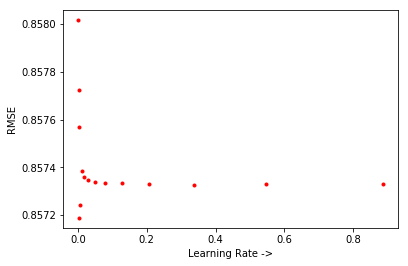

In [22]:
X,Y=get_X_Y(train_data)
rmse_list=list()
alpha_list=list()
lamda=0
learning_rates=10**np.random.uniform(-6,1,50)
learning_rates=list()
temp=0.001
while temp<1.4:
    learning_rates.append(temp)
    temp*=2
for learning_rate in 10**np.linspace(-3,1,20):
    t = int( time.time() * 1000.0 )
    np.random.seed( ((t & 0xff000000) >> 24)+((t & 0x00ff0000)>>8) +((t & 0x0000ff00)<<8)+((t & 0x000000ff)<<24))
    Theta=np.random.randn(5)
    Theta,cost_list,iter_list=gradientDescent(X,Y,Theta,learning_rate,len(train_data), 20000)
    rmse_list.append(get_rmse(Theta))
    alpha_list.append(learning_rate)
plot_rmse(alpha_list,rmse_list)


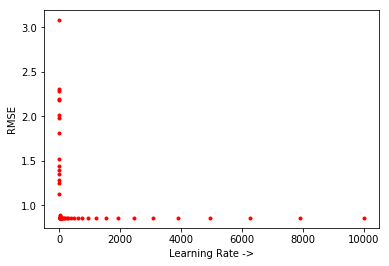

In [26]:
X,Y=get_X_Y(train_data)
rmse_list=list()
alpha_list=list()
lamda=0
for learning_rate in 10**np.linspace(-1,4,50):
    t = int( time.time() * 1000.0 )
    np.random.seed( ((t & 0xff000000) >> 24)+((t & 0x00ff0000)>>8) +((t & 0x0000ff00)<<8)+((t & 0x000000ff)<<24))
    Theta=np.random.randn(5)
    Theta,cost_list,iter_list=irls_descent(X,Y,Theta,learning_rate,len(train_data), 10000)
    rmse_list.append(get_rmse(Theta))
    alpha_list.append(learning_rate)
plot_rmse(alpha_list,rmse_list)


In [27]:
min(rmse_list)

0.85697964089489209